In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SingleCoin import SingleCoinBetting
%matplotlib inline

In [4]:
initial_logwealth = 10       # The log of the amount of money we start with before the betting
nflips = 1000               # The number of iterated coin flips that will be sequentially bet on
p =0.6                      # The probability of winning the coin flip
coin = SingleCoinBetting(p=p, initial_logwealth=initial_logwealth)

In [6]:
nrepeats = 1000             
final_wealth = np.zeros(nrepeats)

for r in range((nrepeats)):
    coin.logwealth = initial_logwealth
    coin.gamble(nflips)
    final_wealth[r] = coin.logwealth
    
freq = []
logtargets = np.array((10,15,20,25,30,35,40,45,50,55))
for t in logtargets:
    freq.append((np.sum(final_wealth >= t))/float(nrepeats))

In [7]:
pred = [] 
coin.logwealth = initial_logwealth
for t in logtargets:
    pred.append(coin.prob_exceeding_target(target=np.exp(t), n_trials=nflips))


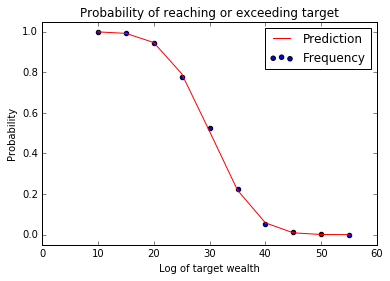

In [8]:
plt.scatter(logtargets, freq)
plt.plot(logtargets, pred, color='red')
plt.ylim(-0.05,1.05)
plt.xlabel('Log of target wealth')
plt.ylabel('Probability')
plt.title('Probability of reaching or exceeding target')
plt.legend(('Prediction','Frequency'))
plt.show()

In the second example, we have a target, but the number of trials, i.e. coin flips is unkown. 

In [30]:
logtarget = 300
initial_logwealth = 10
coin.logwealth = initial_logwealth

nrepeats = 1000            
maxflips = nflips

win_count = 0
n = 1
logwealth = coin.logwealth

for r in range(nrepeats):
    for flip in range(nflips):
        coin.gamble(n_trials=1)
        if coin.logwealth >= logtarget:
            win_count += 1
            break

In [31]:
print n

1


In [35]:
win_count = 0
n = 1
logwealth = coin.logwealth
for r in range(nrepeats):
    while logwealth <= logtarget and n <= maxflips:
        coin.gamble(n_trials=n)
        logwealth = coin.logwealth
        n += 1
    if logwealth <= logtarget:
        win_count += 1

print win_count/nrepeats/0.1

0.0


In [72]:
n

41